In [114]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import matthews_corrcoef
import time

In [115]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [116]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [118]:
df.shape

(1000, 40)

In [119]:
df.drop('_c39',axis='columns', inplace=True)

In [120]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [121]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [122]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [123]:
df.columns[(df == '?').any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [124]:
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [125]:
df['police_report_available'] = df['police_report_available'].replace("?", "unknown")
df['collision_type'] = df['collision_type'].replace("?", "unknown")
df['property_damage'] = df['property_damage'].replace("?", "unknown")

In [126]:
def object_datatype_report(df):
    feature_name =[]
    distinct_count=[]
    for col in df:
        if df[col].dtype == 'object':
            feature_name.append(str(col)) 
            distinct_count.append(df[col].nunique())

    object_type_features = pd.DataFrame()
    object_type_features['feature_name'] = feature_name
    object_type_features['distinct_count']= distinct_count
            
    object_type_features=object_type_features.sort_values('distinct_count',ascending=False)
    return object_type_features

In [127]:
df=df.drop(['incident_location','policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted','auto_make','auto_model'],axis=1)

In [128]:
df=pd.get_dummies(df,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','property_damage','police_report_available'],drop_first=True)

In [129]:
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,property_damage_unknown,police_report_available_YES,police_report_available_unknown
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1,0,0,0,0,0,1,0,1,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,1,0,0,1,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,0,0,1,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,1,0,0,1,0,0,1
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,1,0,0,0,1,0,0,1
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,1,1,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,1,1,0


In [130]:
df["fraud_reported"]= df["fraud_reported"].map({"N":0, "Y":1})


In [131]:
X=df.drop(['fraud_reported'],axis='columns')

In [132]:
y=df['fraud_reported']

In [133]:
scaling_obj=StandardScaler()
X_scal = scaling_obj.fit_transform(X)

# EDA

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

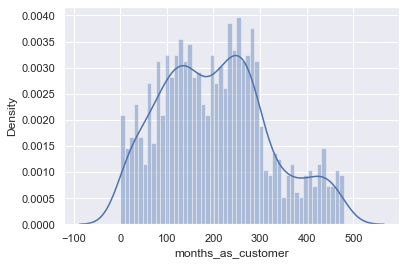

In [134]:
sns.distplot(df["months_as_customer"],bins=50)

<AxesSubplot:xlabel='age', ylabel='Density'>

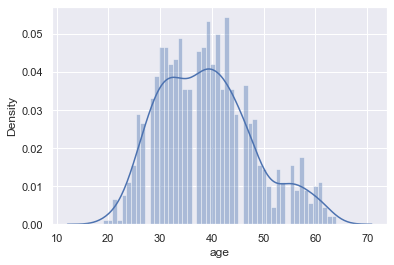

In [135]:
sns.distplot(df["age"],bins=50)

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

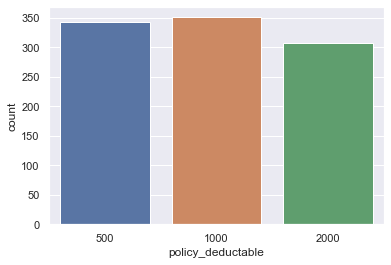

In [146]:
sns.countplot("policy_deductable",data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

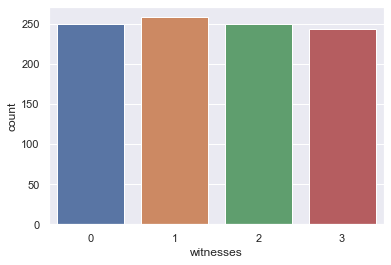

In [147]:
sns.countplot("witnesses",data=df)

# Model

In [148]:
def label_prediction(model, X_test):
    predicted_values = model.predict(X_test)
    return predicted_values

In [149]:
def calculate_metrics(model, X_train, X_test, Y_test, y_train):
    predicted_y_test = label_prediction(model, X_test)
    training_accuracy = accuracy_score(y_train, label_prediction(model,X_train))
    testing_accuracy = accuracy_score(Y_test, predicted_y_test)
    conf_matrix = confusion_matrix(Y_test, predicted_y_test)
    cls_report = classification_report(Y_test, predicted_y_test)
    mathews_coef = matthews_corrcoef(Y_test,predicted_y_test)
    return training_accuracy, testing_accuracy, conf_matrix,cls_report, mathews_coef

In [150]:
def model_statictics(model_conf_matrix):
    a = model_conf_matrix[0][0]
    b = model_conf_matrix[1][0]
    c = model_conf_matrix[0][1]
    d = model_conf_matrix[1][1]
    p1 = a + b
    p2 = a + c
    q1 = c + d
    q2 = b + d
    k = [2* (a*d - b*c) / (p1*q2 +p2*q1)]
    sensitivity = a / (a+ c)
    specificity = 1- (b / (b+d))
    return k, specificity, sensitivity
    

In [151]:
def print_metrics(model_metrics, model_name,model_statictics):
    print(f"Training Accuracy of {model_name} is {round(model_metrics[0]* 100,3)}%")
    print(f"Testing Accuracy of {model_name} is {round(model_metrics[1] * 100,3)}%")
    print(f"Confusion matrix of {model_name} is\n {model_metrics[2]}")
    print("\n")
    print(f"Classification report for {model_name} is \n {model_metrics[3]}")
    print("\n")
    print(f"Cohen Kappa Score for {model_name} is {model_statictics[0]}")
    print(f"Sensitivity for {model_name} is {model_statictics[2]}")
    print(f"Specificity for {model_name} is {model_statictics[1]}")
    print(f"Mathew's Coefficient for {model_name} is {model_metrics[4]}")

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X_scal, y, test_size=0.2,stratify=y, random_state=20)

SVM

In [153]:
svc = SVC(C=1.0,kernel='linear')
svm_model = svc.fit(X_train, y_train)
label_prediction(svm_model, X_test )
svm_metrics = calculate_metrics(svm_model, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 89.625%
Testing Accuracy of SVM is 83.0%
Confusion matrix of SVM is
 [[132  19]
 [ 15  34]]


Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.64      0.69      0.67        49

    accuracy                           0.83       200
   macro avg       0.77      0.78      0.78       200
weighted avg       0.84      0.83      0.83       200



Cohen Kappa Score for SVM is [0.5528081020649743]
Sensitivity for SVM is 0.8741721854304636
Specificity for SVM is 0.6938775510204082
Mathew's Coefficient for SVM is 0.553574752017733


KNN

In [154]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn_model = knn.fit(X_train, y_train)
label_prediction(knn_model, X_test )
knn_metrics = calculate_metrics(knn_model, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print_metrics(knn_metrics, 'KNN',knn_statistics )

Training Accuracy of KNN is 77.875%
Testing Accuracy of KNN is 76.5%
Confusion matrix of KNN is
 [[149   2]
 [ 45   4]]


Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.77      0.99      0.86       151
           1       0.67      0.08      0.15        49

    accuracy                           0.77       200
   macro avg       0.72      0.53      0.50       200
weighted avg       0.74      0.77      0.69       200



Cohen Kappa Score for KNN is [0.09719554360353438]
Sensitivity for KNN is 0.9867549668874173
Specificity for KNN is 0.08163265306122447
Mathew's Coefficient for KNN is 0.1724199492877261


Decision Tree

In [155]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model=dt_model.fit(X_train, y_train)
label_prediction(dt_model, X_test )
dt_metrics = calculate_metrics(dt_model, X_train, X_test, y_test, y_train)
dt_statistics = model_statictics(dt_metrics[2])
print_metrics(dt_metrics, 'dt_model',dt_statistics )

Training Accuracy of dt_model is 100.0%
Testing Accuracy of dt_model is 77.5%
Confusion matrix of dt_model is
 [[124  27]
 [ 18  31]]


Classification report for dt_model is 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       151
           1       0.53      0.63      0.58        49

    accuracy                           0.78       200
   macro avg       0.70      0.73      0.71       200
weighted avg       0.79      0.78      0.78       200



Cohen Kappa Score for dt_model is [0.42733519979638585]
Sensitivity for dt_model is 0.8211920529801324
Specificity for dt_model is 0.6326530612244898
Mathew's Coefficient for dt_model is 0.4301659287561513


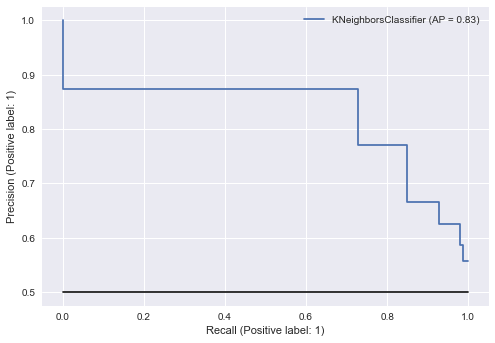

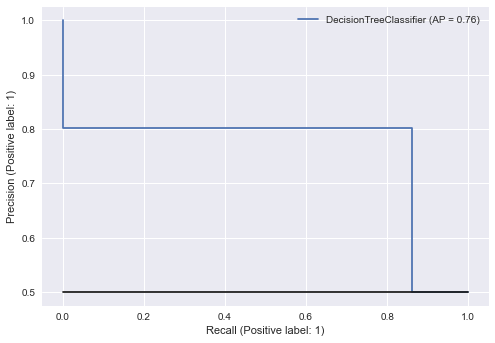

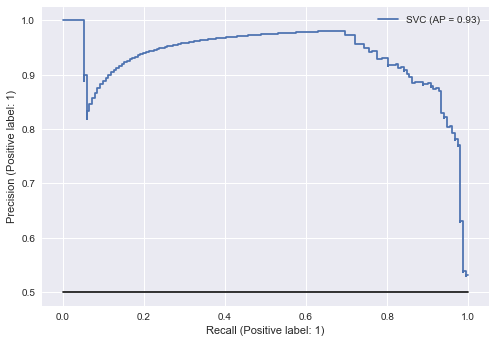

In [169]:
y_test.value_counts()
baseline_prc = y_test.value_counts()[1]/ (y_test.value_counts()[0]+y_test.value_counts()[1])
for i in [knn_model,dt_model,svm_model,]:
    plt.style.use('seaborn')
    plot_precision_recall_curve(i, X_test, y_test)
    plt.plot([0,1],[baseline_prc,baseline_prc],c='k')
    plt.legend(loc="best")
    plt.show()
#plot_precision_recall_curve(rand_tuned, X_test, y_test)
#plot_precision_recall_curve(knn_tuned, X_test, y_test)
#plot_precision_recall_curve(knn_tuned, X_test, y_test)
#plt.plot([0,1],[baseline_prc,baseline_prc],c='k')
#plt.legend(loc="best")
#plt.show()
#baseline for this is fraction of positive cases in dataset

In [170]:
def calculate_roc_auc(model, X_test,y_test):
    predict_prob = model.predict_proba(X_test)
    FPR, TPR, Threshold = roc_curve(y_test, predict_prob[:,1], pos_label=1)
    model_auc_score = roc_auc_score(y_test, predict_prob[:,1])
    return FPR, TPR, Threshold, model_auc_score
    

In [171]:
def calculate_PRC(model, X_test,y_test):
    predict_prob = model.predict_proba(X_test)
    precision,recall, _ = precision_recall_curve(y_test, predict_prob[:,1])
    return precision, recall,_

In [172]:
y_pred_svm = svm_model.decision_function(X_test)
svm_fpr,svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

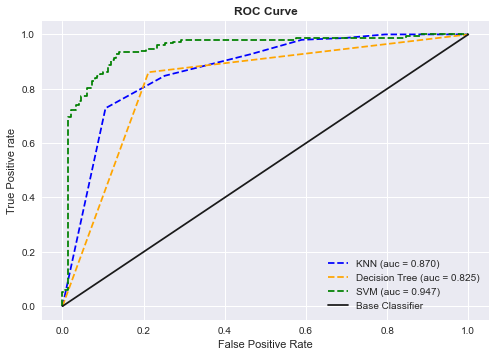

In [177]:
plt.style.use('seaborn')
FPR_knn, TPR_knn, Threshold_knn, model_auc_score_knn = calculate_roc_auc(knn_model,X_test,y_test)
plt.plot(FPR_knn, TPR_knn, linestyle='--',color='blue', label='KNN (auc = %0.3f)'% model_auc_score_knn )
FPR_dtc, TPR_dtc, Threshold_dtc, model_auc_score_dtc = calculate_roc_auc(dt_model,X_test,y_test)
plt.plot(FPR_dtc, TPR_dtc, linestyle='--',color='orange', label='Decision Tree (auc = %0.3f)'% model_auc_score_dtc)
plt.plot(svm_fpr, svm_tpr, linestyle='--',color='green',label='SVM (auc = %0.3f)' % auc_svm)
#Xg_clf
plt.plot([0,1],[0,1],c='k',label='Base Classifier') # baseline classifier
plt.title('ROC Curve',fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')   
plt.savefig('ROC',dpi=300)
plt.show()

# Handing Imbalanced dataset using SMOTE

In [157]:
X_balanced , Y_balanced = SMOTE().fit_resample(X, y)

print(X_balanced.shape)
print(Y_balanced.shape)

(1506, 89)
(1506,)


In [158]:
Y_balanced.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

In [159]:
## scaling down all input values to follow standard normal distribution using standardscaler method
scaling_obj=StandardScaler()
X_scaled = scaling_obj.fit_transform(X_balanced)

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_balanced,test_size=0.2, stratify=Y_balanced,random_state=20)

SVM Model After SMOTE

In [161]:
vc = SVC(kernel='linear')
svm_model = svc.fit(X_train, y_train)
label_prediction(svm_model, X_test )
svm_metrics = calculate_metrics(svm_model, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 92.857%
Testing Accuracy of SVM is 89.404%
Confusion matrix of SVM is
 [[133  18]
 [ 14 137]]


Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       151
           1       0.88      0.91      0.90       151

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



Cohen Kappa Score for SVM is [0.7880794701986755]
Sensitivity for SVM is 0.8807947019867549
Specificity for SVM is 0.9072847682119205
Mathew's Coefficient for SVM is 0.7883561227922861


KNN Model After SMOTE

In [162]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn_model = knn.fit(X_train, y_train)
label_prediction(knn_model, X_test )
knn_metrics = calculate_metrics(knn_model, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print_metrics(knn_metrics, 'KNN',knn_statistics )

Training Accuracy of KNN is 50.166%
Testing Accuracy of KNN is 50.0%
Confusion matrix of KNN is
 [[  0 151]
 [  0 151]]


Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.50      1.00      0.67       151

    accuracy                           0.50       302
   macro avg       0.25      0.50      0.33       302
weighted avg       0.25      0.50      0.33       302



Cohen Kappa Score for KNN is [0.0]
Sensitivity for KNN is 0.0
Specificity for KNN is 1.0
Mathew's Coefficient for KNN is 0.0


Decision Tree After SMOTE

In [163]:
dt_model = DecisionTreeClassifier()
dt_model=dt_model.fit(X_train, y_train)
label_prediction(dt_model, X_test )
dt_metrics = calculate_metrics(dt_model, X_train, X_test, y_test, y_train)
dt_statistics = model_statictics(dt_metrics[2])
print_metrics(dt_metrics, 'dt_model',dt_statistics )

Training Accuracy of dt_model is 100.0%
Testing Accuracy of dt_model is 82.45%
Confusion matrix of dt_model is
 [[119  32]
 [ 21 130]]


Classification report for dt_model is 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       151
           1       0.80      0.86      0.83       151

    accuracy                           0.82       302
   macro avg       0.83      0.82      0.82       302
weighted avg       0.83      0.82      0.82       302



Cohen Kappa Score for dt_model is [0.6490066225165563]
Sensitivity for dt_model is 0.7880794701986755
Specificity for dt_model is 0.8609271523178808
Mathew's Coefficient for dt_model is 0.6507355761931698


ADA Boost

In [164]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }


    
rs_ab3 = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1, random_state=42)
rs_ab3.fit(X_train, y_train)
print(rs_ab3.best_params_)

{'n_estimators': 100, 'learning_rate': 0.3}


In [165]:
ad_clf = rs_ab3.best_estimator_

#y_pred = rand_clf.predict(X_test)
label_prediction(ad_clf, X_test )
ad_metrics = calculate_metrics(ad_clf, X_train, X_test, y_test, y_train)
ad_statistics = model_statictics(ad_metrics[2])
print_metrics(ad_metrics, 'XG Boost Classifier', ad_statistics)

Training Accuracy of XG Boost Classifier is 88.455%
Testing Accuracy of XG Boost Classifier is 86.755%
Confusion matrix of XG Boost Classifier is
 [[131  20]
 [ 20 131]]


Classification report for XG Boost Classifier is 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.87      0.87      0.87       151

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



Cohen Kappa Score for XG Boost Classifier is [0.7350993377483444]
Sensitivity for XG Boost Classifier is 0.8675496688741722
Specificity for XG Boost Classifier is 0.8675496688741722
Mathew's Coefficient for XG Boost Classifier is 0.7350993377483444
